In [1]:
import pandas as pd
import numpy as np

import pycountry
# visualisation
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy.stats import norm
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool,Select



from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# stats
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')



In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
print(df['InvoiceDate'].head())

0    12/1/2010 8:26
1    12/1/2010 8:26
2    12/1/2010 8:26
3    12/1/2010 8:26
4    12/1/2010 8:26
Name: InvoiceDate, dtype: object


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
print(df['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [6]:
print(df['Quantity'].dtype) 
print(df['UnitPrice'].dtype) 

int64
float64


In [7]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
df.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)
print(df.head()) 
print(df.shape)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
(541909, 8)


In [9]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
print(df[['Quantity', 'UnitPrice', 'TotalSales']].head())

   Quantity  UnitPrice  TotalSales
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


In [10]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
top_products = df.groupby('StockCode').agg(
    total_sales=pd.NamedAgg(column='TotalSales', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='Quantity', aggfunc='sum')
).reset_index()


In [11]:
top_10_products = top_products.sort_values(by='total_sales', ascending=False).head(10)
print(top_10_products)

     StockCode  total_sales  total_quantity
4059       DOT    206245.48            1707
1348     22423    164762.19           12980
2733     47566     98302.98           18022
3536    85123A     97894.50           38830
3515    85099B     92356.03           47363
1982     23084     66756.59           30646
4062      POST     66230.64            6353
1043     22086     63791.94           18902
3305     84879     58959.73           36221
2924     79321     53768.06           10343


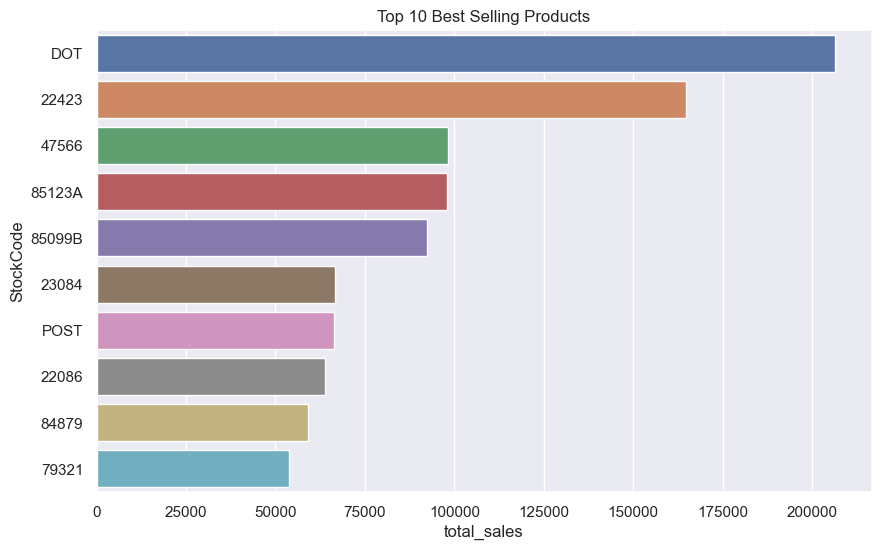

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='StockCode', data=top_10_products)
plt.title('Top 10 Best Selling Products')
plt.show()

In [13]:

df['TotalSales'] = df['Quantity'] * df['UnitPrice']


print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales'],
      dtype='object')


           Country   TotalSales
36  United Kingdom  8187806.364
24     Netherlands   284661.540
10            EIRE   263276.820
14         Germany   221698.210
13          France   197403.900
0        Australia   137077.270
33     Switzerland    56385.350
31           Spain    54774.580
3          Belgium    40910.960
32          Sweden    36595.910


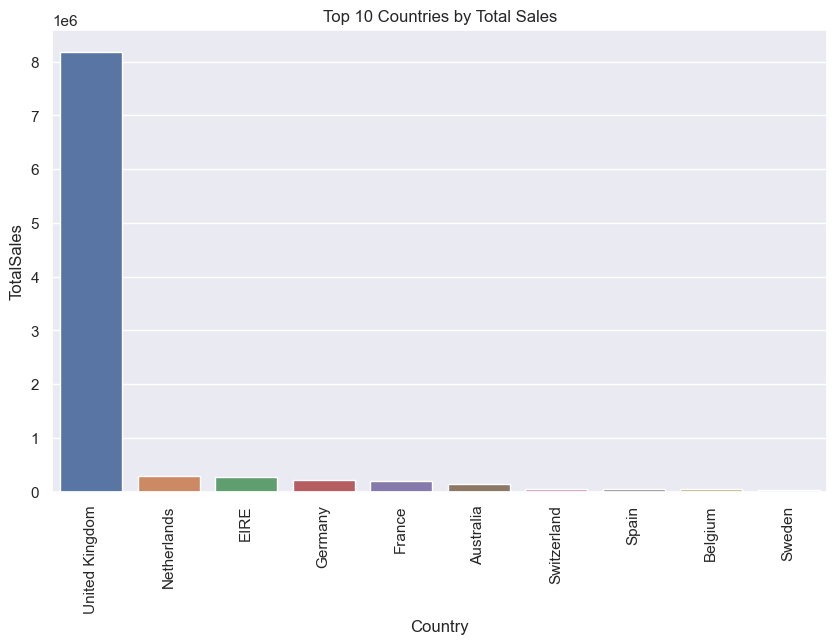

In [14]:
# Country-based total sales analysis
country_sales = df.groupby('Country')['TotalSales'].sum().reset_index()

# Print top 10 countries by total sales
print(country_sales.sort_values(by='TotalSales', ascending=False).head(10))

# Visualization: Total sales by country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='TotalSales', data=country_sales.sort_values(by='TotalSales', ascending=False).head(10))
plt.title('Top 10 Countries by Total Sales')
plt.xticks(rotation=90)
plt.show()


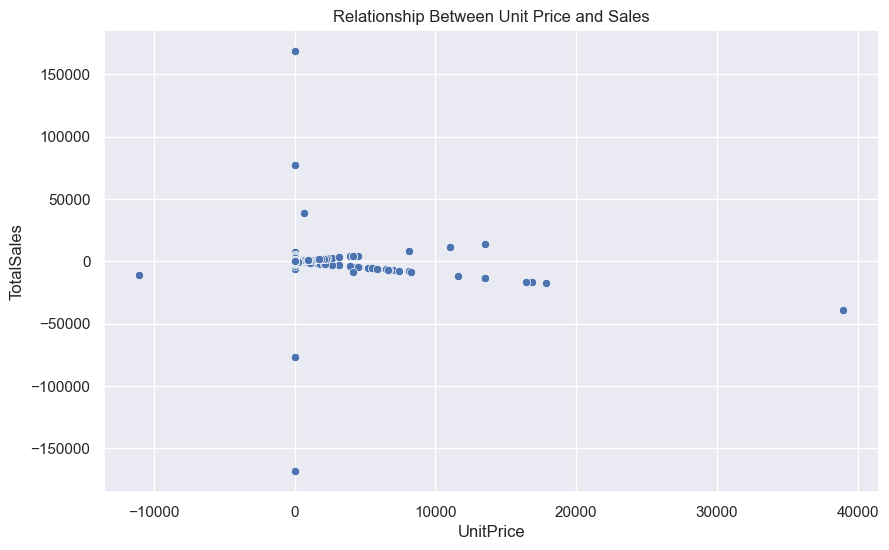

            UnitPrice  TotalSales
UnitPrice    1.000000   -0.162029
TotalSales  -0.162029    1.000000


In [15]:
# Visualizing the relationship between price and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='TotalSales', data=df)
plt.title('Relationship Between Unit Price and Sales')
plt.show()

# Correlation between price and sales
correlation = df[['UnitPrice', 'TotalSales']].corr()
print(correlation)


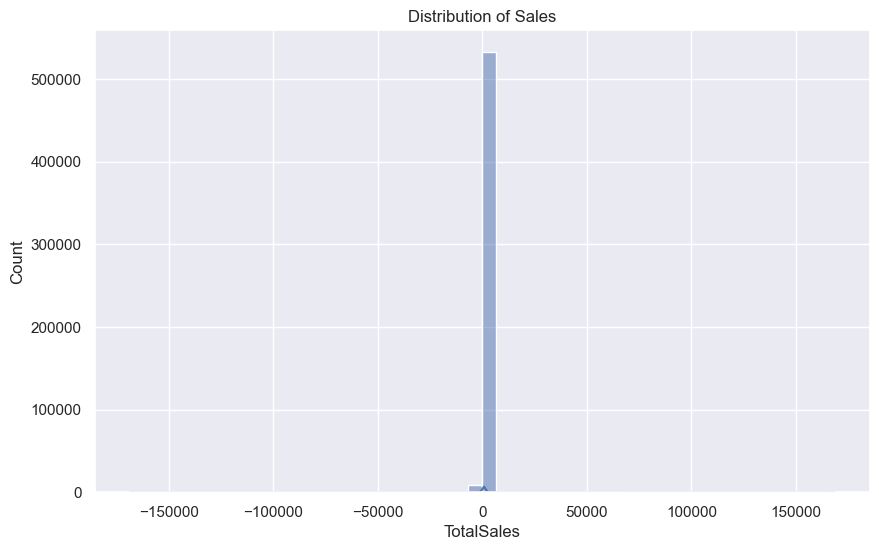

In [16]:
# Visualizing the distribution of sales: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalSales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.show()


In [17]:
print(df[df['InvoiceDate'].isna()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalSales]
Index: []


In [18]:
df.dropna(subset=['InvoiceDate'], inplace=True)
df['InvoiceDate'].fillna(pd.to_datetime('today'), inplace=True)
# Convert 'InvoiceDate' to datetime format (ensuring it's consistent)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', format='%m/%d/%Y %H:%M')
print(df.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [19]:
print(df.dtypes)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalSales            float64
dtype: object


In [20]:
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales'],
      dtype='object')


In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
print(df.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

  YearMonth  
0   2010-12  
1   2010-12  
2   2010-12  
3   2010-12  
4   2010-12  


In [22]:
df['YearMonth'] = df['YearMonth'].astype(str)

In [23]:
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum().reset_index()

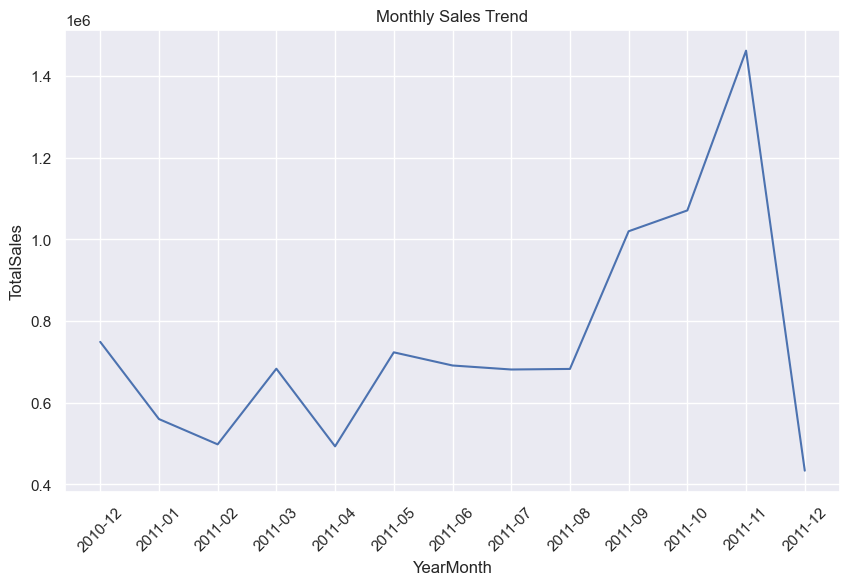

In [24]:
# Visualize sales trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='TotalSales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

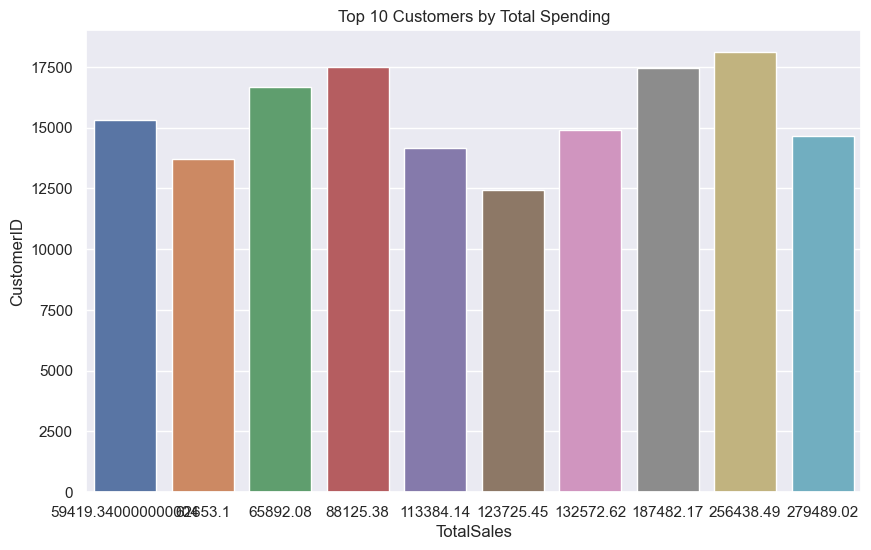

In [25]:
# Customer-based total sales analysis (If 'CustomerID' exists)
customer_spending = df.groupby('CustomerID')['TotalSales'].sum().reset_index()

# Top 10 customers with highest spending
top_10_customers = customer_spending.sort_values(by='TotalSales', ascending=False).head(10)

# Visualizing top 10 customers by total spending
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='CustomerID', data=top_10_customers)
plt.title('Top 10 Customers by Total Spending')
plt.show()

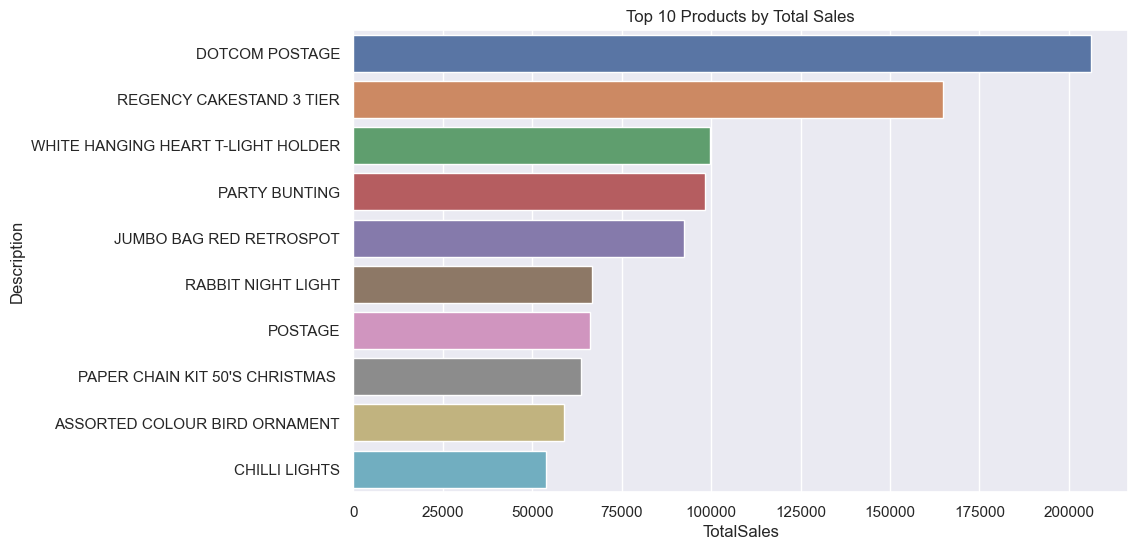

In [26]:
# Group by product description and calculate total sales
product_sales = df.groupby('Description')['TotalSales'].sum().reset_index()

# Sort the products by total sales and select the top 10
top_products = product_sales.sort_values(by='TotalSales', ascending=False).head(10)

# Visualize the top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Description', data=top_products)
plt.title('Top 10 Products by Total Sales')
plt.show()


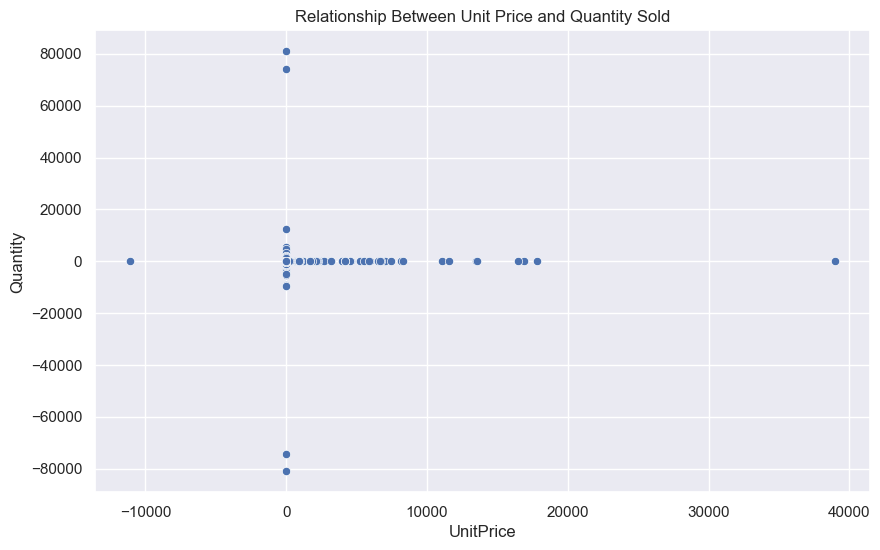

           UnitPrice  Quantity
UnitPrice   1.000000 -0.001235
Quantity   -0.001235  1.000000


In [27]:
# Visualizing the relationship between unit price and quantity sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Relationship Between Unit Price and Quantity Sold')
plt.show()

# Correlation between price and quantity
price_quantity_corr = df[['UnitPrice', 'Quantity']].corr()
print(price_quantity_corr)


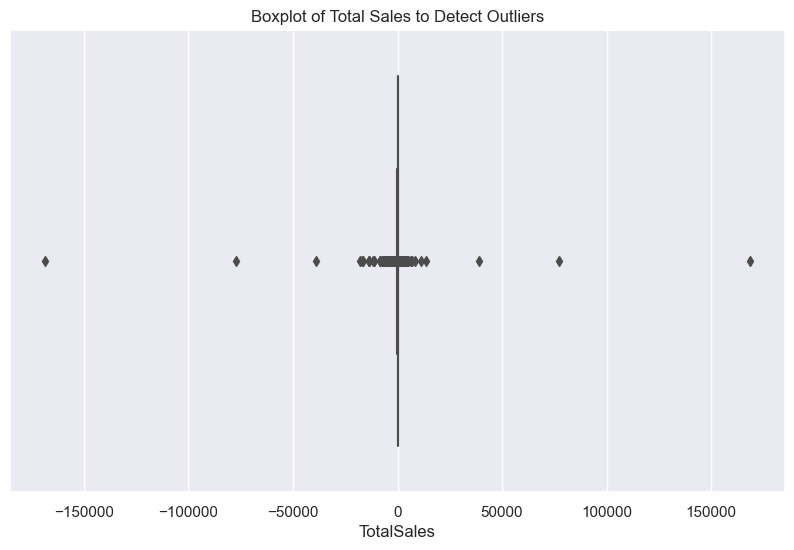

In [28]:
# Detecting outliers using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalSales'])
plt.title('Boxplot of Total Sales to Detect Outliers')
plt.show()


/var/folders/76/7zhmthg13xq2rgxlrtgv76z40000gn/T/ipykernel_1441/2211022991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


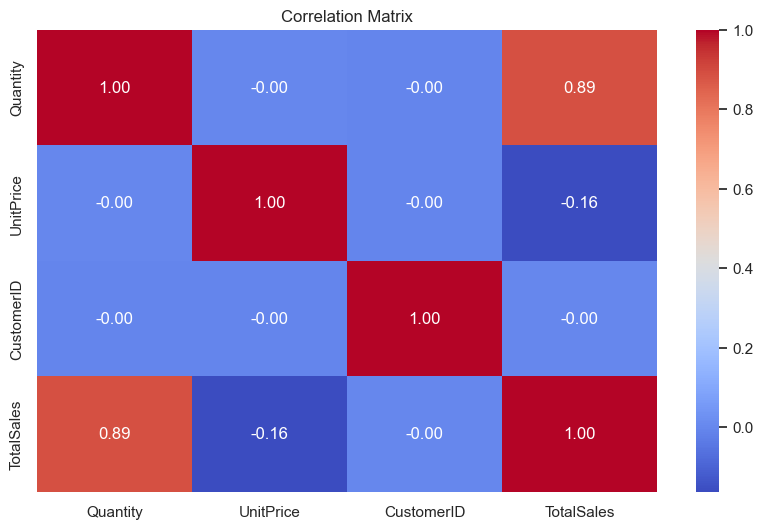

In [29]:
# Correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


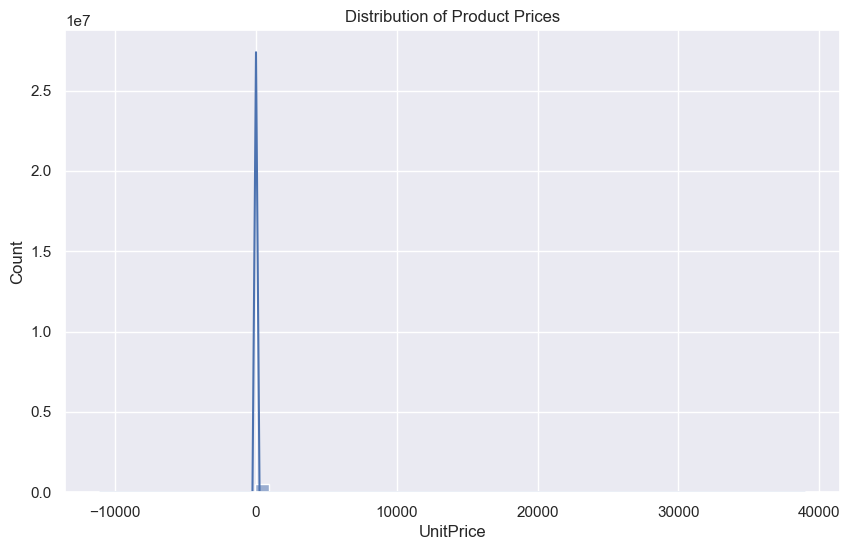

In [30]:
# Visualizing the distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.show()


### 1. Sales Prediction

In [31]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Select features and target
X = df[['Quantity', 'UnitPrice']]  # You can add more features like StockCode, Country, etc.
y = df['TotalSales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 17.433449317229854


### 2. Customer Segmentation (Clustering)

In [32]:
from sklearn.cluster import KMeans

# Aggregate data to the customer level (e.g., total spend, frequency of purchases)
customer_data = df.groupby('CustomerID').agg(
    total_spent=pd.NamedAgg(column='TotalSales', aggfunc='sum'),
    frequency=pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spent', 'frequency']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Show the cluster centers and the labels
print(customer_data.head())


   CustomerID  total_spent  frequency  Cluster
0     12346.0         0.00          2        0
1     12347.0      4310.00          7        0
2     12348.0      1797.24          4        0
3     12349.0      1757.55          1        0
4     12350.0       334.40          1        0


/Users/fatmaakus/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 3. Time Series Sales Forecasting

/Users/fatmaakus/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


TypeError: tz must be string or tzinfo subclass.

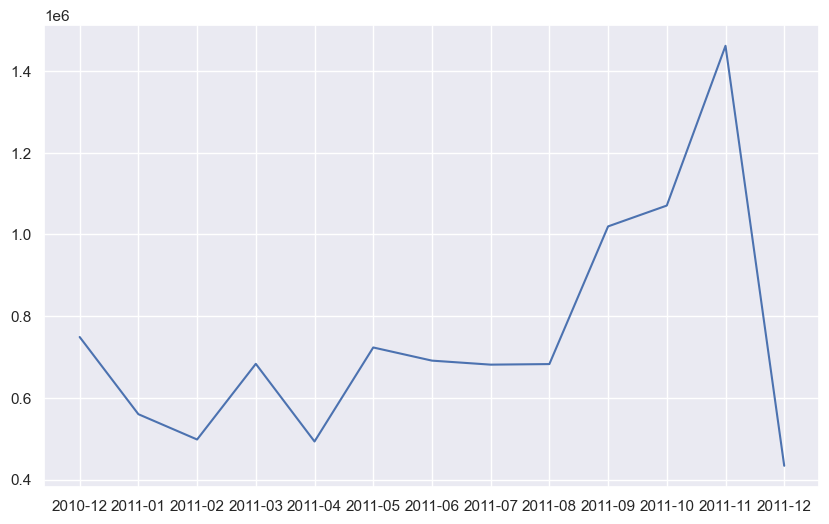

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Aggregate data by month
monthly_sales = df.groupby('YearMonth').agg(
    total_sales=pd.NamedAgg(column='TotalSales', aggfunc='sum')
).reset_index()

# Train the ARIMA model
model = ARIMA(monthly_sales['total_sales'], order=(5, 1, 0))  # You can tune the order
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=12)  # Predict next 12 months

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['total_sales'], label='Historical Sales')
plt.plot(pd.date_range(monthly_sales['YearMonth'].max(), periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.legend()
plt.show()


### 4. Product Demand Prediction

In [34]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalSales            float64
YearMonth              object
dtype: object


In [35]:
df = df.drop(columns=['InvoiceNo', 'Description', 'StockCode'])



In [36]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True)


In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.weekday 
df['Hour'] = df['InvoiceDate'].dt.hour 


In [38]:
df = df.drop(columns=['InvoiceDate'])


In [39]:
print(df.head())

   Quantity  UnitPrice  CustomerID  TotalSales YearMonth  Country_Austria  \
0         6       2.55     17850.0       15.30   2010-12                0   
1         6       3.39     17850.0       20.34   2010-12                0   
2         8       2.75     17850.0       22.00   2010-12                0   
3         6       3.39     17850.0       20.34   2010-12                0   
4         6       3.39     17850.0       20.34   2010-12                0   

   Country_Bahrain  Country_Belgium  Country_Brazil  Country_Canada  ...  \
0                0                0               0               0  ...   
1                0                0               0               0  ...   
2                0                0               0               0  ...   
3                0                0               0               0  ...   
4                0                0               0               0  ...   

   Country_Switzerland  Country_USA  Country_United Arab Emirates  \
0          

In [40]:
# Year ve Month sütunlarını birleştirip YearMonth sütunu oluştur
df['YearMonth'] = df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2)

# YearMonth sütununu sayısal bir değere çevir
df['YearMonth'] = df['YearMonth'].astype(int)

# Veriyi kontrol et
print(df[['Year', 'Month', 'YearMonth']].head())


   Year  Month  YearMonth
0  2010     12     201012
1  2010     12     201012
2  2010     12     201012
3  2010     12     201012
4  2010     12     201012


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fill missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_imputed)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')



Mean Absolute Error: 2.057800249580289
Mean Squared Error: 153271.20078985434
Root Mean Squared Error: 391.49866001029216


### 5. Customer Lifetime Value (CLV) Prediction

In [44]:
print(df.columns)


Index(['Quantity', 'UnitPrice', 'CustomerID', 'TotalSales', 'YearMonth',
       'Country_Austria', 'Country_Bahrain', 'Country_Belgium',
       'Country_Brazil', 'Country_Canada', 'Country_Channel Islands',
       'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark',
       'Country_EIRE', 'Country_European Community', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_Greece',
       'Country_Hong Kong', 'Country_Iceland', 'Country_Israel',
       'Country_Italy', 'Country_Japan', 'Country_Lebanon',
       'Country_Lithuania', 'Country_Malta', 'Country_Netherlands',
       'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour'],
      dtype='object')


In [45]:
# Create a new 'PurchaseDate' column from Year, Month, and Day columns
df['PurchaseDate'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Find the first and last purchase dates for each customer
first_purchase = df.groupby('CustomerID')['PurchaseDate'].min()
last_purchase = df.groupby('CustomerID')['PurchaseDate'].max()

# Add the first and last purchase dates to the dataframe
df['first_purchase_date'] = df['CustomerID'].map(first_purchase)
df['last_purchase_date'] = df['CustomerID'].map(last_purchase)

# Calculate Recency: the number of days since the last purchase
df['Recency'] = (df['last_purchase_date'] - df['PurchaseDate']).dt.days

# Display the resulting dataframe with the new 'Recency' column
print(df[['CustomerID', 'PurchaseDate', 'Recency']].head())


   CustomerID PurchaseDate  Recency
0     17850.0   2010-12-01     71.0
1     17850.0   2010-12-01     71.0
2     17850.0   2010-12-01     71.0
3     17850.0   2010-12-01     71.0
4     17850.0   2010-12-01     71.0
